In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd

In [2]:
my_example_nc_file = 'Downloads/air.mon.mean.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [3]:
fh.variables

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     units: degrees_north
     actual_range: [ 90. -90.]
     long_name: Latitude
     standard_name: latitude
     axis: Y
 unlimited dimensions: 
 current shape = (73,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     units: degrees_east
     long_name: Longitude
     actual_range: [  0.  357.5]
     standard_name: longitude
     axis: X
 unlimited dimensions: 
 current shape = (144,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     long_name: Time
     delta_t: 0000-01-00 00:00:00
     avg_period: 0000-01-00 00:00:00
     prev_avg_period: 0000-00-01 00:00:00
     standard_name: time
     axis: T
     units: hours since 1800-01-01 00:00:0.0
     actual_range: [1297320. 1946016.]
 unlimited dimensions: time
 current shape = (889,)
 filling on, default _FillValue

In [4]:
print(fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    description: Data from NCEP initialized reanalysis (4x/day).  These are the 0.9950 sigma level values
    platform: Model
    Conventions: COARDS
    NCO: 20121012
    history: Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc air.mon.mean.nc
Thu May  4 18:11:50 2000: ncrcat -d time,0,622 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc ./surface/air.mon.mean.nc
Mon Jul  5 23:47:18 1999: ncrcat ./air.mon.mean.nc /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc /dm/dmwork/nmc.rean.ingest/combinedMMs/surface/air.mon.mean.nc
/home/hoop/crdc/cpreanjuke2farm/cpreanjuke2farm Mon Oct 23 21:04:20 1995 from air.sfc.gauss.85.nc
created 95/03/13 by Hoop (netCDF2.3)
Converted to chunked, deflated non-packed NetCDF4 2014/09
    title: monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    Re

In [5]:
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
time = fh.variables['time'][:]
air = fh.variables['air'][:]
#tmax_units = fh.variables['Tmax'].units

In [6]:
air_jan_2022 = air[888]

In [7]:
#!pip3 install matplotlib
#!pip3 install Basemap
import matplotlib.pyplot as plt
!pip3 install seaborn
import seaborn as sns
#from mpl_toolkits.basemap import Basemap

Defaulting to user installation because normal site-packages is not writeable


In [8]:
temp_mean = air.mean(axis =(1,2))

Text(0.5, 1.0, 'mean global temperature increase')

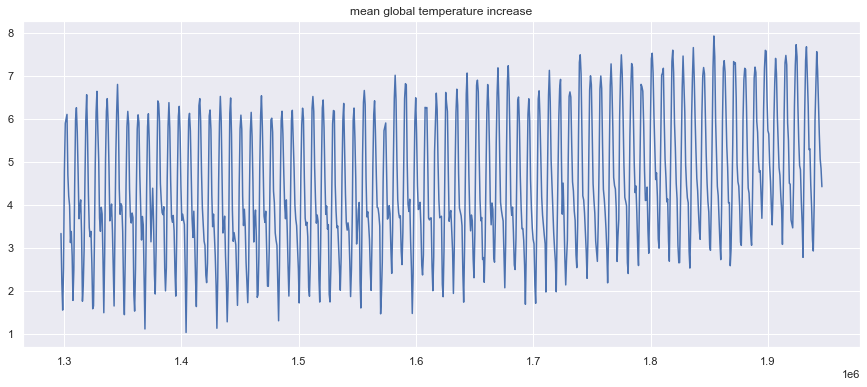

In [9]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))

# Plot the responses for different events and regions
sns.lineplot(x=time, y=temp_mean ,ax=ax)
plt.title('mean global temperature increase')
#detrend data

In [24]:
C02 = "Downloads/co2_mm_mlo2.csv"

In [25]:
data = pd.read_csv(C02 , on_bad_lines='skip')

In [26]:
data

,year,month,decimal date,average,interpolated,trend,ndays,dn
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
762,2021,9,2021.7083,413.30,416.90,27,0.29,0.11
763,2021,10,2021.7917,413.93,417.30,29,0.35,0.12
764,2021,11,2021.8750,415.01,417.07,30,0.36,0.13
765,2021,12,2021.9583,416.71,417.44,28,0.48,0.17


Text(0.5, 1.0, 'mean global CO2 increase')

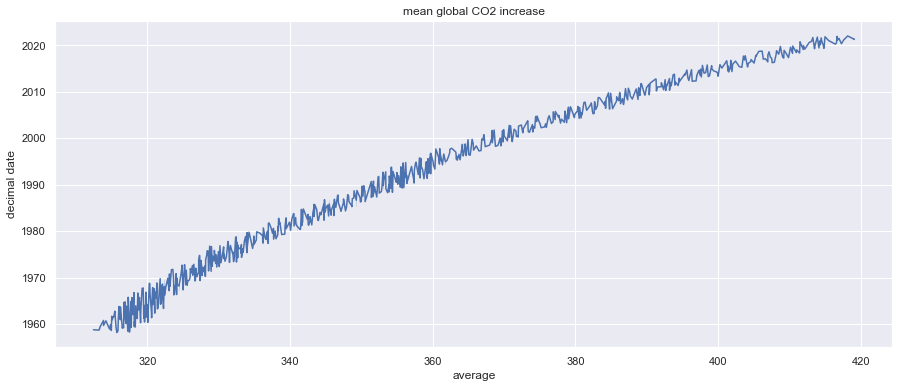

In [28]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))

# Plot the responses for different events and regions
sns.lineplot(x="average", y="decimal date" ,ax=ax , data = data)
plt.title('mean global CO2 increase')

In [33]:
methane  = pd.read_fwf('Documents/GitHub/ML-Climate-Final-Project-Template/data/methane_1983-today-data.txt')


In [34]:
methane

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.542,1626.0,2.3,1634.7,1.5
1,1983,8,1983.625,1628.0,2.9,1635.3,1.4
2,1983,9,1983.708,1638.4,2.3,1635.9,1.3
3,1983,10,1983.792,1644.8,1.4,1636.5,1.2
4,1983,11,1983.875,1642.6,0.8,1637.3,1.2
...,...,...,...,...,...,...,...
455,2021,6,2021.458,1888.6,-9.9,1894.7,-9.9
456,2021,7,2021.542,1886.5,-9.9,1895.9,-9.9
457,2021,8,2021.625,1892.6,-9.9,1897.0,-9.9
458,2021,9,2021.708,1903.0,-9.9,1898.0,-9.9


In [38]:
precipitation_file = 'Downloads/cru_ts4.05.1901.2020.pre.dat.nc'
pre = Dataset(precipitation_file, mode='r')

In [39]:
pre #too many missing values

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    title: CRU TS4.05 Precipitation
    institution: Data held at British Atmospheric Data Centre, RAL, UK.
    source: Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history: Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegridsauto.for called by update.for
    references: Information on the data is available at http://badc.nerc.ac.uk/data/cru/
    comment: Access to these data is available to any registered CEDA user.
    contact: support@ceda.ac.uk
    dimensions(sizes): lon(720), lat(360), time(1440)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 time(time), float32 pre(time, lat, lon), int32 stn(time, lat, lon)
    groups: 

In [44]:
lonsp = pre.variables['lon'][:]
latsp = pre.variables['lat'][:]
timep = pre.variables['time'][:]
stn = pre.variables['stn'][:]
precipitation = pre.variables['pre'][:]

In [45]:
stn

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --,